<a href="https://colab.research.google.com/github/eerfan2/Dynamic-System-Modeling/blob/main/Ular_Tangga_RNG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Parameter LCG

In [2]:
a = 4
M = 21
Z0 = 17
N = 30

2. Papan Ular Tangga

In [1]:
tangga = {2: 38, 7: 14, 8: 31, 15: 26, 28: 84, 21: 42, 36: 44, 51: 67, 71: 91, 78: 98, 87: 94}
ular = {16: 6, 46: 25, 49: 11, 62: 19, 64: 60, 74: 53, 89: 68, 92: 88, 95: 75, 99: 80}

3. Inisialisasi Variabel

In [3]:
Z = Z0
positions = [1]
result = []

4. Algoritma RNG

In [4]:
for i in range(1, N + 1):
    Z_prev = Z
    Z = (a * Z) % M
    U = Z / M

    U_rounded = round(U, 3)
    U_str = f"{U_rounded:.3f}"

    dice_roll = (Z % 6) + 1
    current_pos = positions[-1]
    new_pos = current_pos + dice_roll
    if new_pos > 100:
        new_pos = current_pos
    if new_pos in tangga:
        new_pos = tangga[new_pos]
    elif new_pos in ular:
        new_pos = ular[new_pos]
    positions.append(new_pos)


    rumus = f"(5*{Z_prev}) mod {M}"
    result.append([i, Z_prev, rumus, Z, dice_roll, U_str, current_pos, new_pos])
    if new_pos == 100:
        break

5. Output Hasil


In [5]:
print(f"{'i':<3} | {'Zi-1 (Bilangan Sebelumnya)':<28} | {'Rumus RNG':<25} | {'Zi (RNG)':<12} | {'Dadu':<6} | {'Ui (Bil. Acak Seragam)':<22} | {'Posisi Awal':<13} | {'Posisi Akhir':<13}")
print("-" * 145)

for row in result:
    print(f"{row[0]:<3} | {row[1]:<28} | {row[2]:<25} | {row[3]:<12} | {row[4]:<6} | {row[5]:<22} | {row[6]:<13} | {row[7]:<13}")

i   | Zi-1 (Bilangan Sebelumnya)   | Rumus RNG                 | Zi (RNG)     | Dadu   | Ui (Bil. Acak Seragam) | Posisi Awal   | Posisi Akhir 
-------------------------------------------------------------------------------------------------------------------------------------------------
1   | 17                           | (5*17) mod 21             | 5            | 6      | 0.238                  | 1             | 14           
2   | 5                            | (5*5) mod 21              | 20           | 3      | 0.952                  | 14            | 17           
3   | 20                           | (5*20) mod 21             | 17           | 6      | 0.810                  | 17            | 23           
4   | 17                           | (5*17) mod 21             | 5            | 6      | 0.238                  | 23            | 29           
5   | 5                            | (5*5) mod 21              | 20           | 3      | 0.952                  | 29            | 32  

6. Visualisasi

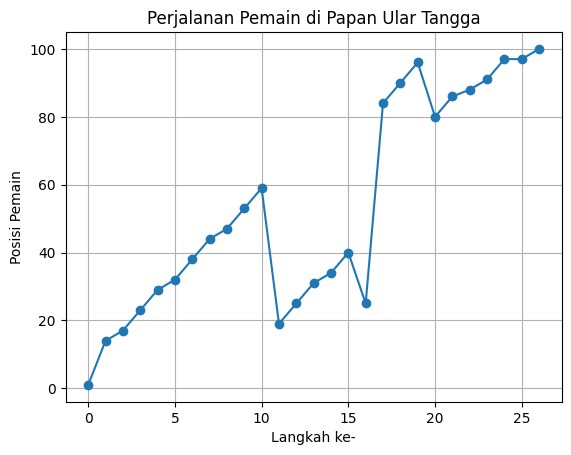

In [6]:
import matplotlib.pyplot as plt

plt.plot(positions, marker='o')
plt.title('Perjalanan Pemain di Papan Ular Tangga')
plt.xlabel('Langkah ke-')
plt.ylabel('Posisi Pemain')
plt.grid()
plt.show()